#                                              PROJECT
 

# spam classification

In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#extracting data from dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data.head()

,class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data['class'].value_counts()

ham     4825
spam     747
Name: class, dtype: int64

# some visualizations

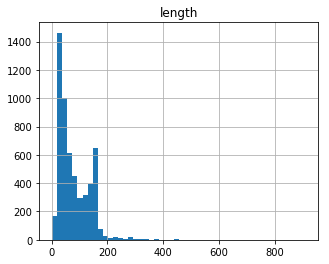

In [5]:
data['length'] = data['SMS'].map(lambda x: len(x))
data.hist(column='length',bins=50, figsize=(5,4))
plt.show()

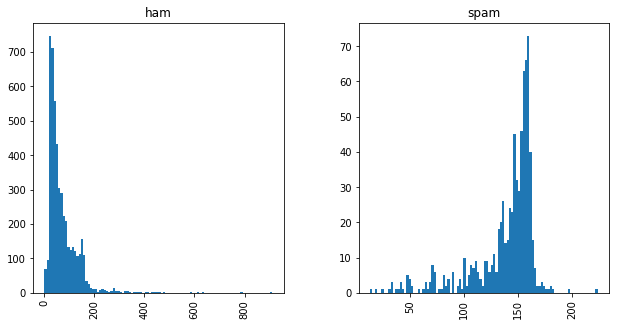

In [6]:
data.hist(column='length', by='class', bins=100, figsize=(10,5))
plt.show()

In [16]:
data = data.replace(['ham','spam'],[0, 1])

In [7]:
data.head()

,class,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Feature extraction of test data using TF-IDF vectorizer.

In [22]:
smstext = pd.DataFrame(data['SMS'])
smsclass = pd.DataFrame(data['class'])

In [23]:
from collections import Counter

total_counts = Counter()
for i in range(len(smstext)):
    for word in smstext.values[i][0].split(" "):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  15585


In [24]:
## Sorting in decreasing order (Word with highest frequency appears first)
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab[:60])

['to', 'you', 'I', 'a', 'the', 'and', 'in', 'is', 'i', 'u', 'for', '', 'my', 'of', 'your', 'me', 'on', 'have', '2', 'that', 'are', 'it', 'call', 'or', 'be', 'at', 'with', 'not', 'will', 'get', 'can', 'U', 'so', 'ur', "I'm", 'but', '&lt;#&gt;', 'You', 'from', '4', 'do', 'up', 'just', '.', 'if', 'go', 'when', 'know', 'this', 'like', 'we', 'all', 'out', 'got', 'was', 'come', 'now', '?', 'am', '...']


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data['SMS'])
vectors.shape

(5572, 8672)

In [14]:
features = vectors

# Training and Testing data

In [15]:
import sklearn
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, data['class'], test_size=0.15, random_state=111)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4736, 8672)
(836, 8672)
(4736,)
(836,)


# Split the skewed data into shuffled sets using stratified shuffle split in sklearn library


In [16]:
from sklearn.cross_validation import StratifiedShuffleSplit
y=np.array(data['class'])
sss= StratifiedShuffleSplit(y,10, test_size=0.3, train_size=None, random_state=None)
print(len(sss))
print(sss)
for train_index, test_index in sss:
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    #X_train, X_test = X[train_index], X[test_index]
    #y_train, y_test = y[train_index], y[test_index]

10
StratifiedShuffleSplit(labels=['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham'], n_iter=10, test_size=0.3, random_state=None)
TRAIN: [2726 1616 1631 ..., 3691 2584 3036]
TEST: [2671 4354  501 ...,  276 1296 1177]
TRAIN: [4401 3372 5378 ..., 1732 4277 1416]
TEST: [2995 2806 1564 ..., 2766 1549 3841]
TRAIN: [3836   38 4273 ..., 4337  840 3300]
TEST: [3855 2314  652 ..., 3871 1887 5223]
TRAIN: [2950 4462 3360 ..., 4769 2388  705]
TEST: [2037 3871 3776 ...,  424 4861 1441]
TRAIN: [1318 1598 1639 ..., 5102 1377  162]
TEST: [1954 1739 3268 ..., 3932  934 5144]
TRAIN: [1283 2436 2193 ..., 5132 2870 2800]
TEST: [2720 5195  770 ..., 2042 5455 3689]
TRAIN: [2534 1798  443 ..., 2530 5118 1676]
TEST: [4375 1837 4016 ..., 4930 3632  259]
TRAIN: [2215 4315 3065 ..., 2908  167  510]
TEST: [5473 1710 1289 ..., 4396 3539 2494]
TRAIN: [2776 5540 5000 ..., 3965 2901 1718]
TEST: [1321 2046 2783 ...,  611 2964 4165]
TRAIN: [3303  340 5224 ..., 3673 2178 4596]
TEST: [   4  951 4101 ..., 1962 1252 3158]


# Using standard classifiers to classify the data into spam or ham.


In [47]:
#1.Logistic Regression
from sklearn.linear_model import LogisticRegression
#2.Support Vector Machine
from sklearn.svm import SVC
#3.Naive Bayes(Multinomial Naive Bayes)
from sklearn.naive_bayes import MultinomialNB
#4.Decision Tree
from sklearn.tree import DecisionTreeClassifier
#5.K-Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
#6. Random Forest
from sklearn.ensemble import RandomForestClassifier

#metrics for accuracy of models
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier(n_neighbors=49)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=31, random_state=111)

# Showing CONFUSION MATRIX of models

In [49]:
clfs = {'SVC' : svc,'KN' : knc, 'NB': mnb, 'DT': dtc, 'LR': lrc, 'RF': rfc}

def train(clf, features, targets):    
    clf.fit(features, targets)

def predict(clf, features):
    return (clf.predict(features))

pred_scores_word_vectors = []
pred_scores_word_vectors1 = []
matrix= []
report=[]

#showing Accuracy Score and F1 score
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    pred_scores_word_vectors.append((k, [accuracy_score(y_test , pred)]))
    pred_scores_word_vectors1.append((k, [f1_score(y_test , pred)]))
 
#showing confusion matrix
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    matrix.append((k,[confusion_matrix(y_test,pred)]))  

for i in range(len(matrix)):
    print(matrix[i])
    print("\n")

('LR', [array([[717,   8],
       [ 18,  93]])])


('SVC', [array([[724,   1],
       [  8, 103]])])


('RF', [array([[725,   0],
       [ 11, 100]])])


('KN', [array([[725,   0],
       [ 32,  79]])])


('DT', [array([[716,   9],
       [ 18,  93]])])


('NB', [array([[722,   3],
       [  2, 109]])])




# Showing CLASSIFICATION REPORT of Models

In [50]:
#Showing Classification Report
for k,v in clfs.items():
    train(v, X_train, y_train)
    pred = predict(v, X_test)
    report.append((k,[classification_report(y_test,pred)])) 
    
for i in range(len(report)):
    print(report[i])
    print("\n")

('LR', ['             precision    recall  f1-score   support\n\n          0       0.98      0.99      0.98       725\n          1       0.92      0.84      0.88       111\n\navg / total       0.97      0.97      0.97       836\n'])


('SVC', ['             precision    recall  f1-score   support\n\n          0       0.99      1.00      0.99       725\n          1       0.99      0.93      0.96       111\n\navg / total       0.99      0.99      0.99       836\n'])


('RF', ['             precision    recall  f1-score   support\n\n          0       0.99      1.00      0.99       725\n          1       1.00      0.90      0.95       111\n\navg / total       0.99      0.99      0.99       836\n'])


('KN', ['             precision    recall  f1-score   support\n\n          0       0.96      1.00      0.98       725\n          1       1.00      0.71      0.83       111\n\navg / total       0.96      0.96      0.96       836\n'])


('DT', ['             precision    recall  f1-score   suppo

# Showing Accuracy Scores

In [77]:
predictions = pd.DataFrame.from_items(pred_scores_word_vectors,orient='index', columns=['Accuracy Score'])
predictions

,Accuracy Score
LR,0.968900
RF,0.986842
DT,0.967703
SVC,0.989234
KN,0.961722
NB,0.994019


# Showing F1 Scores

In [78]:
predictions1 = pd.DataFrame.from_items(pred_scores_word_vectors1,orient='index', columns=['F1 Score'])
predictions1

,F1 Score
LR,0.877358
RF,0.947867
DT,0.873239
SVC,0.958140
KN,0.831579
NB,0.977578


# Showing Models based on Accuracy

In [85]:
predictions.plot(kind='bar', ylim=(0.85,1.0), figsize=(10,5), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


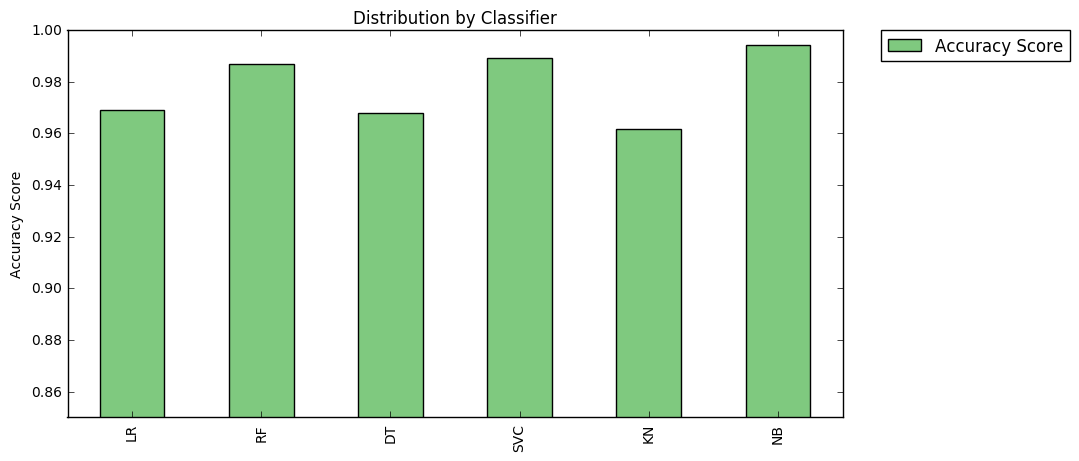

In [86]:
plt.show()

# Showing models based on F1 scores

In [81]:
predictions1.plot(kind='bar', ylim=(0.85,1.0), figsize=(10,5), align='center', colormap="Accent")
plt.xticks(np.arange(6), predictions.index)
plt.ylabel('F1 Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

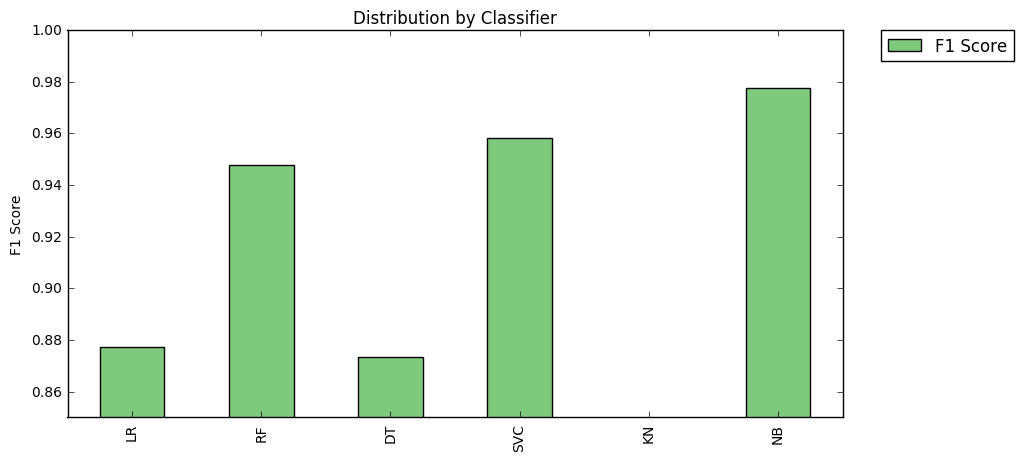

In [82]:
plt.show()

In [52]:
#function to show if the message is spam or not
def find(p):
    if p == 1:
        print ("Message is SPAM")
    else:
        print ("Message is NOT Spam")

In [53]:
text = ["spam and ham"]
integers = vectorizer.transform(text)
p = mnb.predict(integers)[0]
find(p)

Message is NOT Spam


# Saving the BEST MODEL

In [56]:
from sklearn.externals import joblib
joblib.dump(mnb, 'best.pkl')
print ("Best Model (Naive Bayes) Saved")
best = joblib.load('best.pkl')
best

Best Model (Naive Bayes) Saved


MultinomialNB(alpha=0.2, class_prior=None, fit_prior=True)

# Testing data using the model

In [54]:
text1 = ["Hope you enjoyed the content."]
text2 = ["Send your Details."]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)

In [57]:
p1 = best.predict(integers)[0]
p2 = best.predict(integers)[0]

find(p1)
find(p2)

Message is NOT Spam
Message is NOT Spam
